In [85]:
# importing pandas and reading in the data as a pandas dataframe
import pandas as pd
df = pd.read_csv("./players.csv", index_col=0)

In [86]:
#displaying the first 5 rows
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [87]:
# only selecting the five columns wanted
df = df[["player_name", "pts", "player_weight", "player_height", "season"]]

In [88]:
# displaying the first five rows again
df.head()

,player_name,pts,player_weight,player_height,season
0,Randy Livingston,3.9,94.800728,193.04,1996-97
1,Gaylon Nickerson,3.8,86.182480,190.50,1996-97
2,George Lynch,8.3,103.418976,203.20,1996-97
3,George McCloud,10.2,102.058200,203.20,1996-97
4,George Zidek,2.8,119.748288,213.36,1996-97


In [89]:
# calculating the mean-value of the players' heights with the .mean()-function, rounding it to two decimal points
mean_height = round(df["player_height"].mean(), 2)
print(f"Average height of an NBA player between 1996 and 2022: {mean_height} cm")

Average height of an NBA player between 1996 and 2022: 200.56 cm


In [90]:
# calculating the median-value of the players' heights with the .median()-function, rounding it to two decimal points
median_height = round(df["player_height"].median(), 2)
print(f"Median height of an NBA player between 1996 and 2022: {median_height} cm")

Median height of an NBA player between 1996 and 2022: 200.66 cm


In [91]:
# calculating the mean-value of the points per season with the .mean()-function, rounding it to two decimal points
mean_points = round(df["pts"].mean(), 2)
print(f"Average points per season of an NBA player between 1996 and 2022: {mean_points}")

Average points per season of an NBA player between 1996 and 2022: 8.21


In [92]:
# calculating the median-value of the players' points per season with the .median()-function, rounding it to two decimal points
median_points = round(df["pts"].median(), 2)
print(f"Median points of an NBA player between 1996 and 2022: {median_points}")

Median points of an NBA player between 1996 and 2022: 6.7


In [93]:
# calculating the mean-value of the players' weights with the .mean()-function, rounding it to two decimal points
mean_weight = round(df["player_weight"].mean(), 2)
print(f"Average weight of an NBA player between 1996 and 2022: {mean_weight} kg")

Average weight of an NBA player between 1996 and 2022: 100.26 kg


In [94]:
# calculating the median-value of the players' weights with the .median()-function, rounding it to two decimal points
median_weight = round(df["player_weight"].median(), 2)
print(f"Median weight of an NBA player between 1996 and 2022: {median_weight} kg")

Median weight of an NBA player between 1996 and 2022: 99.79 kg


In [95]:
# storing the results for the descriptive statistics in a new dataframe
s = pd.DataFrame([
    (mean_points, median_points), 
    (mean_height, median_height), 
    (mean_weight, median_weight)], 
    index=["Points", "Height (cm)", "Weight (kg)"], 
    columns=["Mean", "Median"]) 
display(s)

,Mean,Median
Points,8.21,6.70
Height (cm),200.56,200.66
Weight (kg),100.26,99.79


In [96]:
# creating a new dataframe, 
# which contains a row for every season with the average weight of players that played in the NBA in this year
mean_weights_by_year = df.groupby("season")["player_weight"].mean().reset_index()
mean_weights_by_year.head()

,season,player_weight
0,1996-97,100.526270
1,1997-98,100.265530
2,1998-99,100.639563
3,1999-00,100.735741
4,2000-01,100.842450


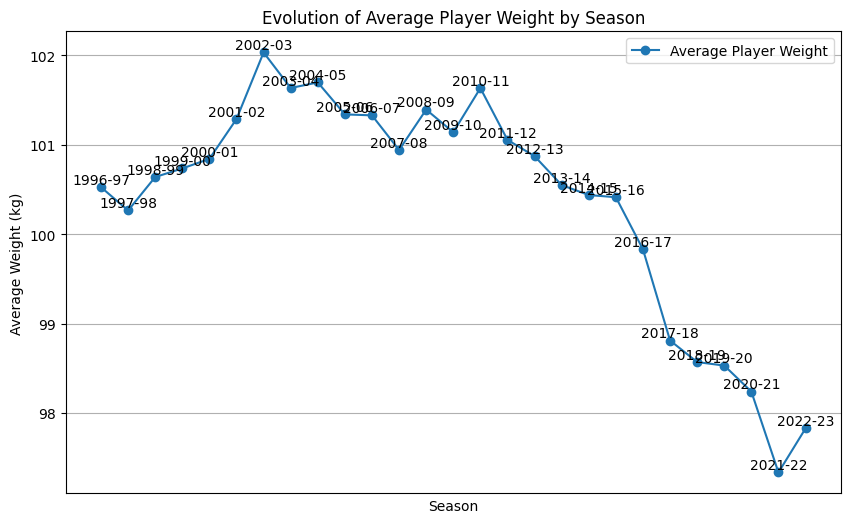

In [97]:
# importing matplotlib
import matplotlib.pyplot as plt

# setting the plot's size
plt.figure(figsize=(10, 6))

# plotting the season on the x-axis and the respective weights on the y-axis
plt.plot(mean_weights_by_year["season"], mean_weights_by_year["player_weight"], marker="o", linestyle="-",
         label="Average Player Weight")

# looping through the dataframe in order to display the season in the plot, above each data point
for index, row in mean_weights_by_year.iterrows():
    plt.text(row["season"], row["player_weight"], str(row["season"]), ha="center", va="bottom")

# giving the plot a title and labeling the axes
plt.title("Evolution of Average Player Weight by Season")
plt.xlabel("Season")
plt.ylabel("Average Weight (kg)")

# removing the ticks on the x-axis, because the year-numbers overlap 
plt.xticks([])

# adding a legend and a grid in the background
plt.legend()
plt.grid(True)

# displaying the plot
plt.show()